### Steps to Make a Model



*   Prepare the Dataset for your Problem
*   Split dataset into traning and testing (X, y)
*   Create a Model
*   Compile the Model (Define Optimizer, loss function and metrics)
*   Fit the Model
*   Evaluate the Model



In [2]:
# Import the libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# Drop the Gender Col

df = df.drop('Gender',axis=1)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


### Visualize the Dataset

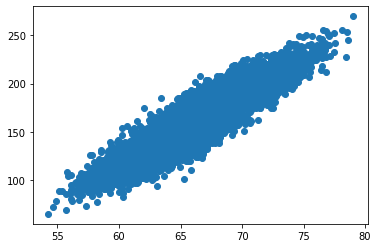

In [7]:
plt.scatter(df['Height'],df['Weight'])
plt.show()

In [19]:
height_X = df['Height']
weight_Y = df['Weight']

# Deep Learning:

  It is a subclass of Machine Learning alogrithm which inspired by human brain neural network architecture.But how?

  First we need to see that what is a neuron?

  ### Neuron:
      A neuron or a perceptron is an equation through which our input flows and make some computation on it and gives us the output.
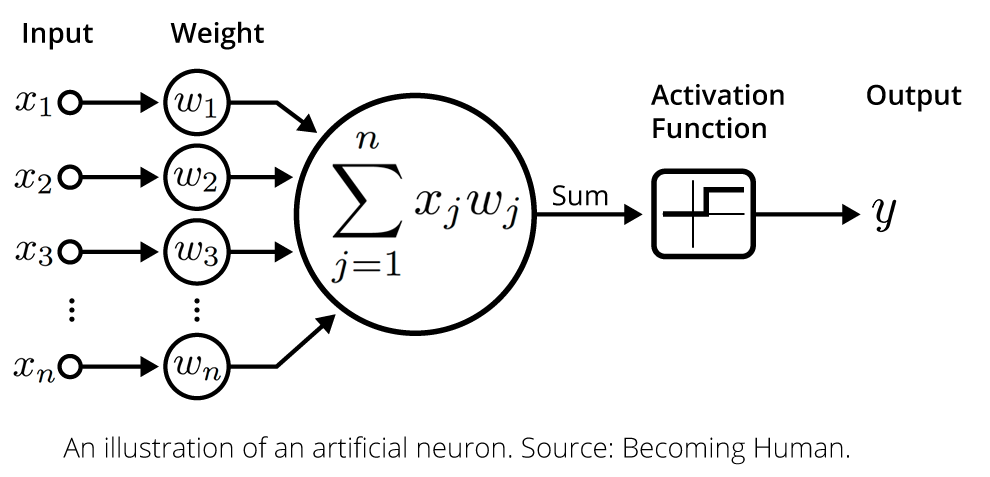


  Some important components of neural networks are:
  

1.   Input Layer
2.   Hidden Layer
3.   Output Layer



#### A deep neural network architecture with many hidden layers.

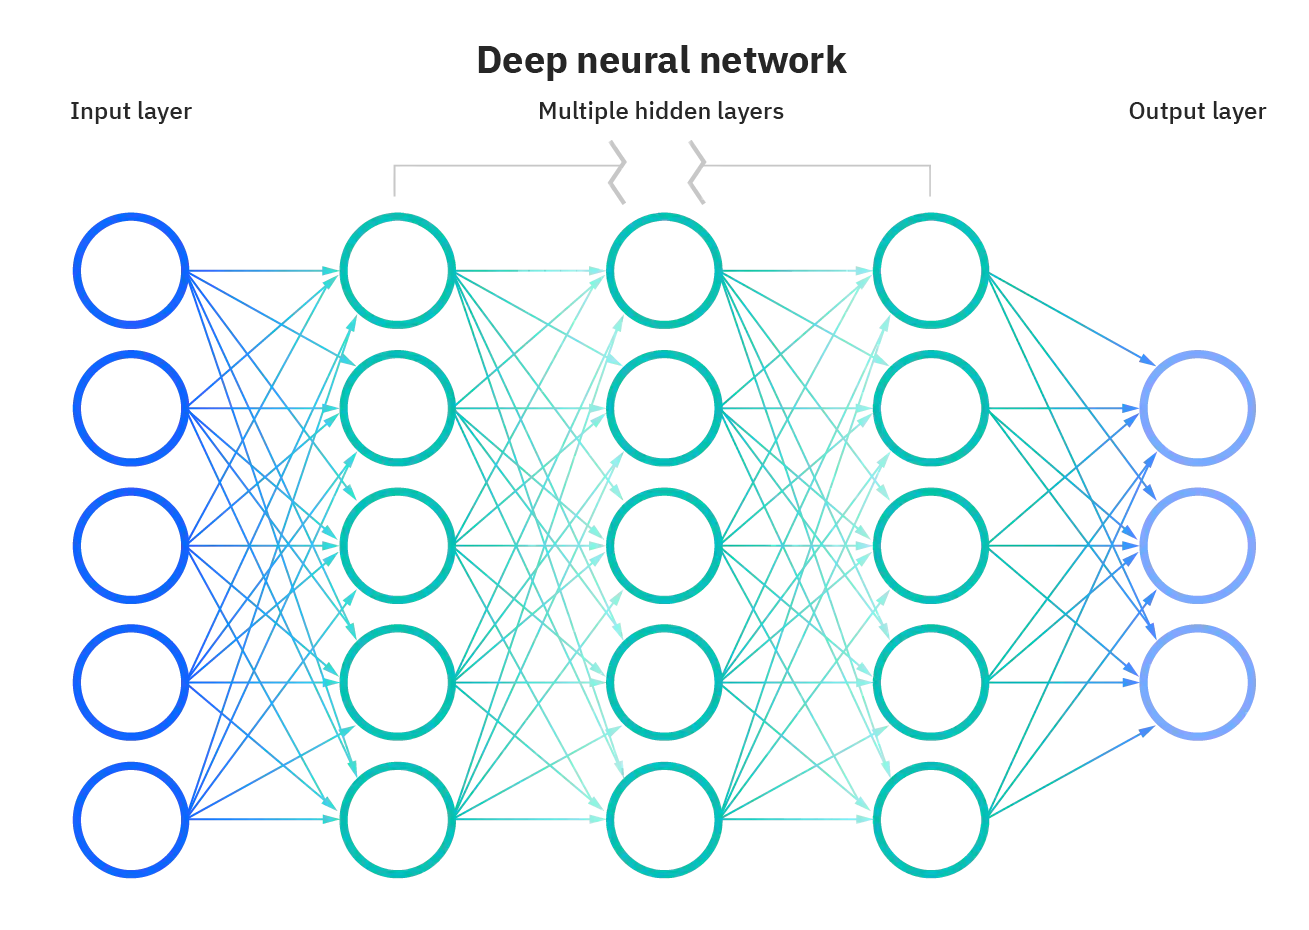

### When we are working with tensorflow there are two approaches to create neural network model, One is Functional API and Other is Sequential API structure we will both types to create our regression model

In [11]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the dataset

X_train, X_test, y_train,y_test = train_test_split(height_X,weight_Y, test_size=0.3)

In [35]:
# Using Sequential API approach

model_Seq = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ]
)

# Compile the model
# loss: which want to optimize
# Optimizers: Algorithm through which we optimize the loss
# metrics: Use to evaluate our model performance

model_Seq.compile(loss = tf.keras.losses.mse, optimizer=tf.keras.optimizers.Adam(),metrics=['mse'])

# Fit the model
model_Seq.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 72073.8359 - mse: 72073.8359
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 64571.3867 - mse: 64571.3867
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 57667.6953 - mse: 57667.6953
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 51315.9531 - mse: 51315.9531
Epoch 5/10
219/219 [==============================] - 1s 2ms/step - loss: 45485.2422 - mse: 45485.2422
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 40145.1992 - mse: 40145.1992
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 35266.2773 - mse: 35266.2773
Epoch 8/10
219/219 [==============================] - 1s 3ms/step - loss: 30820.0586 - mse: 30820.0586
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 26781.0098 - mse: 26781.0098
Epoch 10/10
219/219 [==============================] - 1s 2ms/step - loss

In [36]:
# Lets check our predictions

pred = model_Seq.predict([X_train.iloc[40]])

print('Actual: ',y_train.iloc[40])
print('Predicted: ',pred)

Actual:  145.139481166407
Predicted:  [[18.305897]]


### Our model is performning so bad so  We can tweak our prediction by changing our Hyperparameters.

### ok so what is Hyperparameters now?

##Hyper Parameters:
Hyperparameters are the variables which determines the network structure(Eg: Number of Hidden Units) and the variables which determine how the network is trained(Eg: Learning Rate). Hyperparameters are set before training(before optimizing the weights and bias).

In short we can use them to improve our model.

In [37]:
# Using Sequential API approach

model_Seq = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ]
)

# Compile the model
# loss: which want to optimize
# Optimizers: Algorithm through which we optimize the loss
# metrics: Use to evaluate our model performance

model_Seq.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

# Fit the model
model_Seq.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 1ms/step - loss: 21.9429 - mae: 21.9429
Epoch 2/10
219/219 [==============================] - 0s 1ms/step - loss: 20.9755 - mae: 20.9755
Epoch 3/10
219/219 [==============================] - 0s 1ms/step - loss: 21.0537 - mae: 21.0537
Epoch 4/10
219/219 [==============================] - 0s 1ms/step - loss: 21.0180 - mae: 21.0180
Epoch 5/10
219/219 [==============================] - 0s 1ms/step - loss: 20.9480 - mae: 20.9480
Epoch 6/10
219/219 [==============================] - 0s 1ms/step - loss: 21.0232 - mae: 21.0232
Epoch 7/10
219/219 [==============================] - 0s 1ms/step - loss: 21.0101 - mae: 21.0101
Epoch 8/10
219/219 [==============================] - 0s 1ms/step - loss: 20.9632 - mae: 20.9632
Epoch 9/10
219/219 [==============================] - 0s 1ms/step - loss: 21.1231 - mae: 21.1231
Epoch 10/10
219/219 [==============================] - 0s 1ms/step - loss: 20.8475 - mae: 20.8475


In [38]:
# Lets check our predictions

pred = model_Seq.predict([X_train.iloc[40]])

print('Actual: ',y_train.iloc[40])
print('Predicted: ',pred)

Actual:  145.139481166407
Predicted:  [[152.68004]]


Now it is much better

# Visualization of Model

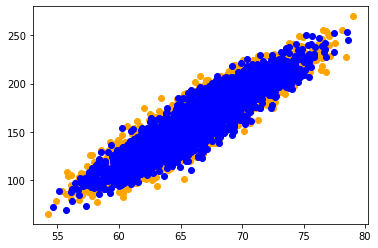

In [40]:
plt.scatter(X_train,y_train,color='orange')
plt.scatter(X_test,y_test,color='blue')

plt.show()

In [45]:
# Again create similar model with different hyperparameters and more layers


model_Seq = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10, input_shape=[1]), # specify the input shape
     tf.keras.layers.Dense(1)
    ]
)

# Compile the model
# loss: which want to optimize
# Optimizers: Algorithm through which we optimize the loss
# metrics: Use to evaluate our model performance

model_Seq.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

In [46]:
model_Seq.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


####Total params: total number of parameters

####Trainable Parameters: weights and biases in our model that model update during traning

In [47]:

# Fit the model
model_Seq.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 89.2396 - mae: 89.2396
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 85.3487 - mae: 85.3487
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 91.1677 - mae: 91.1677
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 86.5570 - mae: 86.5570
Epoch 5/10
219/219 [==============================] - 1s 2ms/step - loss: 85.9455 - mae: 85.9455
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 86.6658 - mae: 86.6658
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 84.2428 - mae: 84.2428
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 86.4667 - mae: 86.4667
Epoch 9/10
219/219 [==============================] - 1s 3ms/step - loss: 84.9740 - mae: 84.9740
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 82.8837 - mae: 82.8837


In [51]:
# Evaluate Model

model_Seq.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 93.6853 - mae: 93.6853


[93.68525695800781, 93.68525695800781]

## Plot Model Architecture

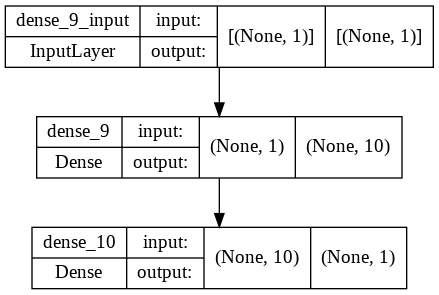

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model_Seq, show_shapes=True)

## Plot Predictions

In [53]:
y_pred = model_Seq.predict(X_test)
y_pred

array([[274.02194],
       [273.2412 ],
       [249.67744],
       ...,
       [285.81198],
       [263.8934 ],
       [236.5397 ]], dtype=float32)

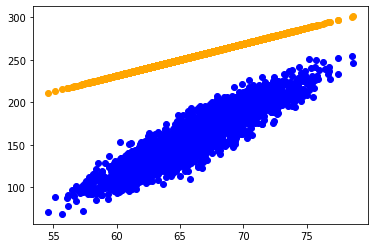

In [54]:
# Plot Test set and its prediction
plt.scatter(X_test,y_test,color='blue')
plt.scatter(X_test,y_pred,color='orange')

plt.show()

What we can conclude from the above visualization?

Our model is underfitting on our testset

### Calculate MSE and MAE from predictions

In [60]:
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(3000,), dtype=float32, numpy=
array([112.370605, 111.589874,  88.03126 , ..., 124.160645, 102.24207 ,
        74.95771 ], dtype=float32)>

In [61]:
tf.math.reduce_sum(mae)

<tf.Tensor: shape=(), dtype=float32, numpy=281130.25>

In [62]:
# Mean Squared Error

mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse
                                    

<tf.Tensor: shape=(3000,), dtype=float32, numpy=
array([13659.262, 13484.408,  8780.703, ..., 16447.975, 11485.55 ,
        6640.376], dtype=float32)>

In [63]:
tf.math.reduce_sum(mse)

<tf.Tensor: shape=(), dtype=float32, numpy=30074656.0>

### Add More hidden layers and change the hyperparameters to improve model

In [71]:
model= tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10,input_shape=[1]),
     tf.keras.layers.Dense(5),
     tf.keras.layers.Dense(1)
    ]
)

# Compile the model
# loss: which want to optimize
# Optimizers: Algorithm through which we optimize the loss
# metrics: Use to evaluate our model performance

model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

# model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=10) 

In [72]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 157.6292 - mae: 157.6292
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 158.0105 - mae: 158.0105
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 156.6795 - mae: 156.6795
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 153.7265 - mae: 153.7265
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 150.2304 - mae: 150.2304
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 147.9551 - mae: 147.9551
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 143.2079 - mae: 143.2079
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 140.8015 - mae: 140.8015
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 136.6983 - mae: 136.6983
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 138.0249 - mae: 138.0249

In [75]:
y_pred =  model.predict(X_test)
y_pred

array([[164.12782],
       [164.11761],
       [163.80963],
       ...,
       [164.28192],
       [163.99544],
       [163.63792]], dtype=float32)

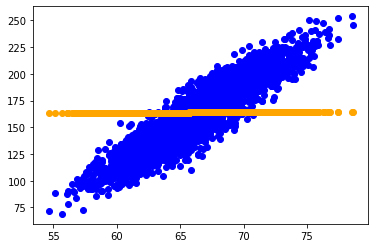

In [77]:
plt.scatter(X_test, y_test,color='blue')
plt.scatter(X_test, y_pred, color='orange')

plt.show()

### Some important things to mention that when to use neural netork architecture.



> When dataset is  large the neural network works well

> When you have unstructured Data it also works on structure data but Classical Machine Learning are great for this purpose.


> When model explainalibilty is not more important because deep learning models are hard to interprete.








